## Kalman Filter

source: https://www.bzarg.com/p/how-a-kalman-filter-works-in-pictures/ <br>
source: https://en.wikipedia.org/wiki/Kalman_filter <br>



objective: estimate state of an process (e.g. position and velocity of driving vehicle)

### initial data

state (e.g. position $p_k$ and velocity $_k$) at step $k=0$:

\begin{align}
x_k &= \begin{pmatrix} p_k \\ v_k \end{pmatrix}
\end{align}

symmetric covariance matrix, wich resembles the uncertainties of the state at step $k=0$:
\begin{align}
P_k &= \begin{pmatrix} \Sigma_{p_k p_k} & \Sigma_{p_k v_k} \\ \Sigma_{v_k p_k} & \Sigma_{v_k v_k} \end{pmatrix}
\end{align}



### 1. estimate next state

estimate next state $x_k$ from previous state $x_{k-1}$ (e.g. change in position $p_k$ and velocity $v_k$) and control input $u_k$ (e.g. acceleration $a_k$):

\begin{align}
\underbrace{\hat{x}_k}_{\text{new state}} &= \underbrace{F_k}_{\text{propagate state}} \underbrace{x_{k-1}}_{\text{prev state}} + \underbrace{B_k}_{\text{propagate input}} \underbrace{u_{k}}_{\text{control input}} \\
\begin{pmatrix} p_x \\ v_x \end{pmatrix} &= \begin{pmatrix} 1 & \Delta t \\ 0 & 1 \end{pmatrix} \begin{pmatrix} p'_x \\ v'_x \end{pmatrix} + \begin{pmatrix} \frac{\Delta t^2}{2} \\ \Delta t \end{pmatrix} a_x
\end{align}

the covaiance matrix also get's updated by:

\begin{align}
\hat{P}_k &= F_k P_{k-1} F_k^T + Q_k \\
\end{align}

where matrix $Q_k$ accounts for the noise from the process noise (error by uncertainty in control input):

the $\hat{\,}$ in $\hat{x}_k,\hat{P}_k$ emphasizes the fact, that our estimate only relies on the the previous state and does not incorparate any measurement's yet.<br>


### 2 measurement space

This get's translated into measurement space (e.g. by an identity matrix $\mathbb{1}$, if measurement is in the same space as the state space):
\begin{align}
\underbrace{\mu_k}_{\text{measurement space}} &= \underbrace{H_k}_{\text{trafo}} \quad \underbrace{\hat{x}_k}_{\text{state}}
\end{align}

with covariance:
\begin{align}
\Sigma_k &= H_k \hat{P}_k H_k^T
\end{align}

note that the transformation is unitary:

\begin{align}
H_k^T H_k = \mathbb{1}
\end{align}

Than the measurement is taken:

\begin{align}
z_k
\end{align}

with covariance (uncertainty):

\begin{align}
R_k &
\end{align}


### 3.1. incorparate measurements

up to this point we have two estimates of the actual state in measurement space. They have the expactation values $\mu_k,z_k$ and are assumed to be gaussian distributed with covariances $\Sigma_k,R_k$. We now have to combine them. Here is how:

### gaussian distribution

\begin{equation}
\mathcal{N}(x, \mu,\sigma) = \frac{1}{ \sigma \sqrt{ 2\pi } } e^{ -\frac{ (x – \mu)^2 }{ 2\sigma^2 } } \qquad \textbf{1 Dim.}
\end{equation}

\begin{equation}
\mathcal{N}({\mathbf x}, \mu,\sigma) = \frac{\exp\left(-\frac 1 2 ({\mathbf x}-{\boldsymbol\mu})^\mathrm{T}{\boldsymbol\Sigma}^{-1}({\mathbf x}-{\boldsymbol\mu})\right)}{\sqrt{(2\pi)^k \mid \boldsymbol\Sigma|}} \qquad \textbf{N Dim.}
\end{equation}

### combining gaussians

<b>1 Dim.</b>:

\begin{equation}
\mathcal{N}(x, \color{fuchsia}{\mu_0}, \color{deeppink}{\sigma_0}) \cdot \mathcal{N}(x, \color{yellowgreen}{\mu_1}, \color{mediumaquamarine}{\sigma_1}) = \mathcal{N}(x, \color{royalblue}{\mu’}, \color{mediumblue}{\sigma’}) 
\end{equation}

with

\begin{align}
\color{royalblue}{\mu’} &= \frac{\sigma_0^2 \mu_1 + \sigma_1^2 \mu_0} {\sigma_0^2 + \sigma_1^2} =  \mu_0 + \frac{\sigma_0^2 (\mu_1 – \mu_0)} {\sigma_0^2 + \sigma_1^2} \\ 
\color{mediumblue}{\sigma’}^2 &= \frac{\sigma_0^2 \cdot \sigma_1^2} {\sigma_0^2 + \sigma_1^2} = \sigma_0^2 – \frac{\sigma_0^4} {\sigma_0^2 + \sigma_1^2} 
\end{align}

or

\begin{equation}
\color{purple}{\mathbf{k}} = \frac{\sigma_0^2}{\sigma_0^2 + \sigma_1^2} 
\end{equation}

\begin{equation} 
\begin{split} 
\color{royalblue}{\mu’} &= \mu_0 + &\color{purple}{\mathbf{k}} (\mu_1 – \mu_0)\\
\color{mediumblue}{\sigma’}^2 &= \sigma_0^2 – &\color{purple}{\mathbf{k}} \sigma_0^2 
\end{split}
\end{equation}

and in matrix notation (<b>multi-Dim.</b>):

\begin{equation}
\color{purple}{\mathbf{K}} = \Sigma_0 (\Sigma_0 + \Sigma_1)^{-1} 
\end{equation}

\begin{equation} 
\begin{split} 
\color{royalblue}{\vec{\mu}’} &= \vec{\mu_0} + &\color{purple}{\mathbf{K}} (\vec{\mu_1} – \vec{\mu_0})\\ 
\color{mediumblue}{\Sigma’} &= \Sigma_0 – &\color{purple}{\mathbf{K}} \Sigma_0 
\end{split}
\end{equation}


### 3.2. incorparate measurements

Therefore our combined estimated for the expactation value is:

\begin{align}
\mathbf{\mu}_k’ &= \mu_k + \mathbf{K} (\mathbf{z}_k – \mathbf{\mu}_k)
\end{align}

and the combined covariance likewise:

\begin{align}
\Sigma’_k &= ( \mathbb{1} – \mathbf{K} ) \Sigma_k
\end{align}

with the matrix $\mathbf{K}$, wich is often called the optimal kalman gain.

\begin{align}
\mathbf{K} = \Sigma_k (\Sigma_k + R_k)^{-1}
\end{align}

### 4. transform back to measurement space
to get the most probable state

\begin{align}
x_k = H^T_k \mu'_k
\end{align}

and it's uncertainty

\begin{align}
P_k = H^T_k \Sigma'_k H_k
\end{align}

### 5. summary
to get the most probable state and it's uncertainty, first calculate the predicted stated

\begin{align}
\hat{x}_k &= F_k x_{k-1} + B_k u_{k} \\
\hat{P}_k &= F_k P_{k-1} F_k^T + Q_k
\end{align}

than the kalman gain

\begin{align}
K' &= H^T_k K \\
&= \hat{P}_k H_k^T (H_k \hat{P}_k H_k^T + R_k)^{-1}
\end{align}

and finally incorparate the measurements

\begin{align}
x_k &= \hat{x}_k + K' (\mathbf{z}_k – H_k \hat{x}_k ) \\
P_k &= ( \mathbb{1} – K' H_k ) \hat{P}_k
\end{align}


## numerical experiments

### gaussian distribution

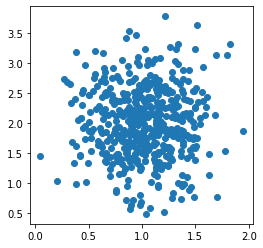

In [2]:
#gaussian distributed data points
%reset -f
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

n_samples=500
#data = np.random.normal(1,0.4,(n_samples,2))
data = np.zeros((n_samples,2))
data[:,0] = np.random.normal(1,0.3,n_samples)
data[:,1] = np.random.normal(2,0.6,n_samples)

fig = plt.figure(figsize=(4,4), dpi=72)
plt.scatter(data[:,0],data[:,1])
plt.show()

In [3]:
#mean and covariance
mean = np.sum(data,axis=0)/n_samples
stray = data-mean
cov = np.dot(stray.T,stray)/n_samples
'''
#equal to (in 2D):
covariance = np.array([[np.sum(stray[:,0]*stray[:,0]),np.sum(stray[:,0]*stray[:,1])],
                      [np.sum(stray[:,1]*stray[:,0]),np.sum(stray[:,1]*stray[:,1])]])/n_samples
'''
mean , cov

(array([1.01768113, 2.00987128]),
 array([[0.09298854, 0.00209705],
        [0.00209705, 0.34398876]]))

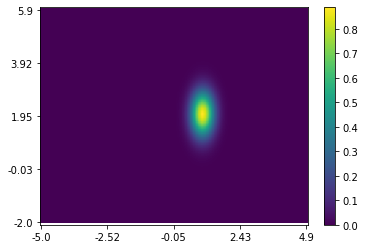

In [4]:
#image plot
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

gauss = lambda xx,x,P: 1/((2*np.pi)*np.linalg.det(P)**0.5) * np.exp( - 0.5* np.einsum( '...k,...k' , np.einsum( '...k,...ki' , (xx-x) , np.linalg.inv(P) ) , (xx-x) ) )

#construct image array
a,b,c,d,e,f = -5,5,0.1,-2,6,0.1
xa,ya = np.mgrid[a:b:c, d:e:f]
ArrOfVec = np.dstack((xa, ya))

ff = gauss(ArrOfVec,mean,cov)

fig = plt.figure(figsize=(6,4), dpi=72)
ax = plt.subplot()
dim = ArrOfVec.shape
ax.set_xticks(np.linspace(0,dim[0]-1,5))
ax.set_yticks(np.linspace(0,dim[1]-1,5))
ax.set_xticklabels(np.round(np.linspace(a,b-c,5),2))
ax.set_yticklabels(np.round(np.linspace(e-f,d,5),2))
plt.imshow(np.rot90(ff))
plt.colorbar()
plt.axis('equal')
plt.draw()

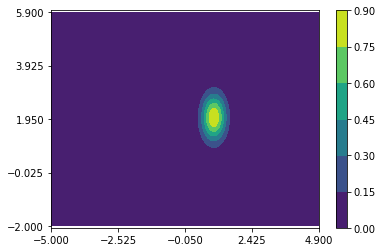

In [5]:
#contour plot
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

a,b,c,d,e,f = -5,5,0.1,-2,6,0.1
xa,ya = np.mgrid[a:b:c, d:e:f]
ArrOfVec = np.dstack((xa, ya))

rv = multivariate_normal(mean, cov)

fig = plt.figure(figsize=(6,4), dpi=72)
ax = plt.subplot()
plt.contourf(xa, ya, rv.pdf(ArrOfVec))
ax.set_xticks(np.linspace(a,b-c,5))
ax.set_yticks(np.linspace(d,e-f,5))
plt.colorbar()
plt.axis('equal')
plt.show()

## Kalman code

In [7]:
#1D example
dt = 0.1 #time step
x = np.array([0,1]) #position,velocity
u = 0.2 #acceleration
F = np.array([[1,dt],[0,1]]) #movement matrix
B = np.array([1/2*dt**2,dt]) #control matrix
H = np.eye(2) #transformation matrix
R = np.ones(2)*0.001 + np.eye(2)*0.05 #mesurement error
Q = np.eye(2)*0.002 #control error
P = R #accumulated error

for i in range(1):
    z = x + np.random.rand(2)*0.2 #measurement
    u = u * np.random.rand(1)*0.2 #acceleration
    
    x_ = np.dot( F , x ) + B * u
    P_ = np.dot( np.dot( F , P ) , F.T ) + Q
    
    K_ = np.dot( np.dot(P_,H.T) , np.linalg.inv( np.dot( np.dot( H , P_ ) , H.T ) + R ) )
    
    x = x_ + np.dot( K_ , (z - np.dot( H , x_ ) ) )
    P = P_ - np.dot( np.dot( K_ , H ) , P_ )

print(x_.shape, P_.shape, x.shape, P.shape)

(2,) (2, 2) (2,) (2, 2)


In [23]:
#2D example
dt = 0.1 #time step
x = np.array([1,0,0,1]) #position px/py, velocity vx/vy
u = [-0.2,0] #acceleration ax/ay
F = np.array([[1,0,dt,0],[0,1,0,dt],[0,0,1,0],[0,0,0,1]]) #movement matrix
B = np.array([[1/2*dt**2,0],[dt,0],[0,1/2*dt**2],[0,dt]]) #control matrix
H = np.eye(4) #transformation matrix
R = np.ones(4)*0.001 + np.eye(4)*0.05 #mesurement error
Q = np.eye(4)*0.002 #control error
P = R #accumulated error

for i in range(1):
    z = x + np.random.rand(4)*0.2 #measurement
    u = u * np.random.rand(2)*0.2 #acceleration
    
    x_ = np.dot( F , x ) + np.dot( B , u )
    P_ = np.dot( np.dot( F , P ) , F.T ) + Q
    
    K_ = np.dot( np.dot(P_,H.T) , np.linalg.inv( np.dot( np.dot( H , P_ ) , H.T ) + R ) )
    
    x = x_ + np.dot( K_ , (z - np.dot( H , x_ ) ) )
    P = P_ - np.dot( np.dot( K_ , H ) , P_ )

print(x_.shape, P_.shape, x.shape, P.shape)

(4,) (4, 4) (4,) (4, 4)


## kalman in action
follow circular path in spite of noise

<IPython.core.display.Javascript object>


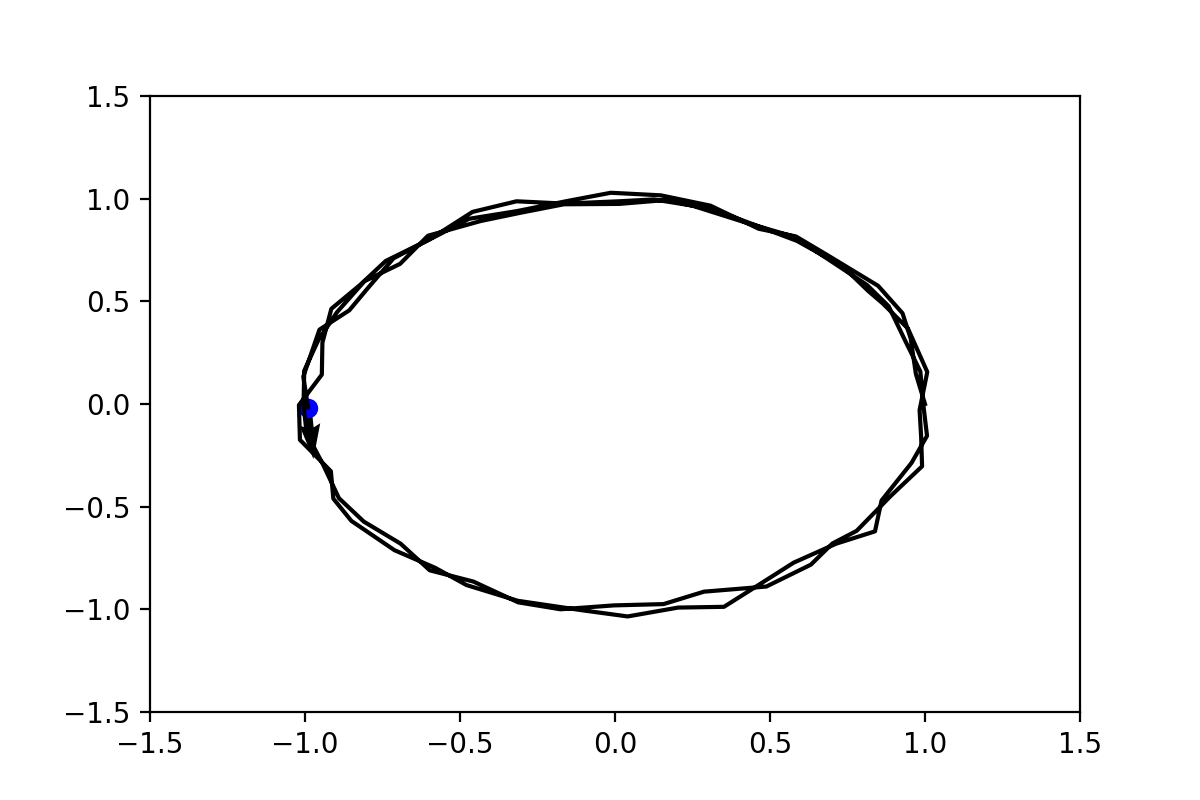

In [7]:
%reset -f
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from time import sleep

#desired position/velocity
theta = 0
steps = 40
dd = lambda theta: np.array([np.cos(2*np.pi*theta/steps),np.sin(2*np.pi*theta/steps),-np.sin(2*np.pi*theta/steps),np.cos(2*np.pi*theta/steps)])

#kalman setup
dt = 1/steps #time step
x = np.array([1,0,0,1]) #position/velocity [px,py,vx,vy]
u = [0,0] #acceleration ax/ay
F = np.array([[1,0,dt,0],[0,1,0,dt],[0,0,1,0],[0,0,0,1]]) #movement matrix
B = np.array([[1/2*dt**2,0],[0,1/2*dt**2],[dt,0],[0,dt]]) #control matrix
H = np.eye(4) #transformation matrix
R = np.ones(4)*0.01 + np.eye(4)*0.5 #mesurement error
Q = np.eye(4)*0.02 #control error
P = R #accumulated error

#plot
plt.ion()

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.set_xticks(np.linspace(-1.5,1.5,7))
ax.set_yticks(np.linspace(-1.5,1.5,7))
im1, = ax.plot(x[0],x[1],color='blue',marker='o',ls='')
quiv = ax.quiver(x[0],x[1],x[2],x[3])
xx,yy = [x[0]],[x[1]]
im2, = ax.plot(x[0],x[1],color='black',marker=' ',ls='-')

for update in range(100):
    
    ##### calculate movement and move to desired position #####
    #based on current estimated position x
    #---
    future_pos = np.dot( F , x ) #estimated future position without control input
    #---
    theta = ( theta + 1 ) % steps
    desired_pos = dd(theta) #desired next position (to move in a circle)
    #---
    delta = desired_pos-future_pos #error
    #---
    # correct error by acceleration:
    ### desired_pos = np.dot( F , x ) + np.dot( B , u )
    ### desired_pos = future_pos + np.dot( B , u )
    ### delta = desired_pos - future_pos = np.dot( B , u )
    ### u = np.dot( np.linalg.inv(B) , delta )
    corr = 0.8 #correct error by this amount with acceleration
    #adding correction:
    #u = np.dot( np.linalg.inv(B) , delta * corr )
    #since array not invertable, calculate correction only for position:
    u = np.dot( np.linalg.inv(np.array(B[0:2,:])) , np.array(delta[0:2]) * corr )
    
    u = np.random.normal(u,0.01) #add control error
    
    ##### predict position after movement #####
    
    x_ = np.dot( F , x ) + np.dot( B , u ) #predicted position
    P_ = np.dot( np.dot( F , P ) , F.T ) + Q #coord transform
    
    K_ = np.dot( np.dot(P_,H.T) , np.linalg.inv( np.dot( np.dot( H , P_ ) , H.T ) + R ) ) #kalman gain
    
    #---
    z = np.random.normal(x_,0.1) #generate noisy measurement
    #---
    
    x = x_ + np.dot( K_ , (z - np.dot( H , x_ ) ) ) #predicted state: fuse prediction with measurement
    P = P_ - np.dot( np.dot( K_ , H ) , P_ ) #update covariance matrix
    '''
    ###debug
    print('x=',np.round(x,2))
    print('future_pos=',np.round(future_pos,2))
    print('desired_pos=',np.round(desired_pos,2))
    print('delta=',np.round(delta,2))
    print('predicted=',np.round(x_,2))
    print('-----')
    '''
    #update plot
    im1.set_xdata(x[0])
    im1.set_ydata(x[1])
    xx.append(x[0])
    yy.append(x[1])
    im2.set_xdata(xx)
    im2.set_ydata(yy)
    quiv.remove()
    quiv = ax.quiver(x[0],x[1],x[2],x[3])
    fig.canvas.draw()
    fig.canvas.flush_events()
    plt.pause(0.05)
